***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
print("Versão do pandas %s" %(pd.__version__))
print("Versão do numpy %s" %(np.__version__))
print("Versão do seaborn %s" %(sns.__version__))

Versão do pandas 1.0.5
Versão do numpy 1.18.5
Versão do seaborn 0.10.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
dados = pd.read_csv("https://raw.githubusercontent.com/jonathasouza/Python/master/DataScience/Alura/Estatistica_com_Python_1/dados.csv")

### Visualize o conteúdo do DataFrame

In [4]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [5]:
intervalos = [dados.Renda.min(), 2*788, 5*788, 15*788, 25*788, dados.Renda.max()]
intervalos

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [6]:
labels = ['E', 'D', 'C', 'B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [7]:
frequencia = pd.value_counts(
    pd.cut(dados.Renda,
           bins = intervalos,
           labels = labels,
           include_lowest = True)
    )
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [8]:
percentuais = pd.value_counts(
    pd.cut(dados.Renda,
           bins = intervalos,
           labels = labels,
           include_lowest = True),
    normalize = True) * 100
percentuais

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [9]:
analise_classes = {"Frequência":frequencia, "Porcentagem (%)":percentuais }
analise_classes = pd.DataFrame(analise_classes)
analise_classes.rename_axis("Classe", axis='columns', inplace = True)
analise_classes.sort_index(ascending =False)

Classe,Frequência,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

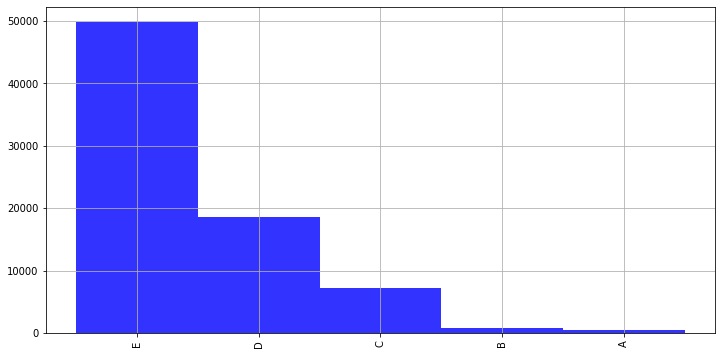

In [10]:
analise_classes_barras = analise_classes["Frequência"].plot.bar(width = 1, color = "blue", alpha = 0.8, figsize = (12,6) )
analise_classes_barras.grid(True)
analise_classes_barras

> ### Conclusões

Podemos verificar que mais de 50% da população amostral ganha até 2 SM e cerca de 90% até 5 SM.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

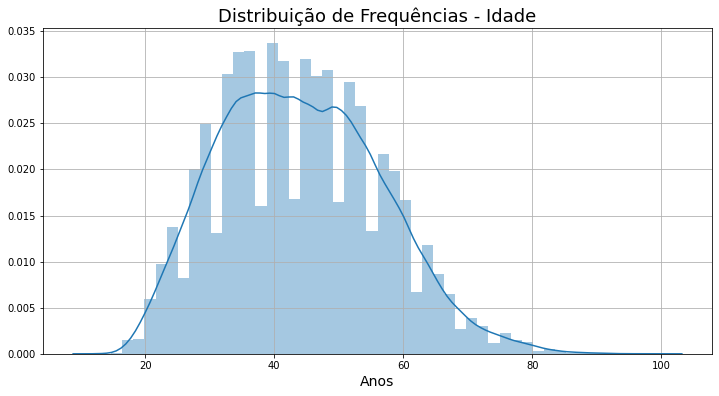

In [11]:
ax = sns.distplot(dados.Idade)
ax.grid(True)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de Frequências - Idade", fontsize=18)
ax.set_xlabel("Anos", fontsize=14)
ax

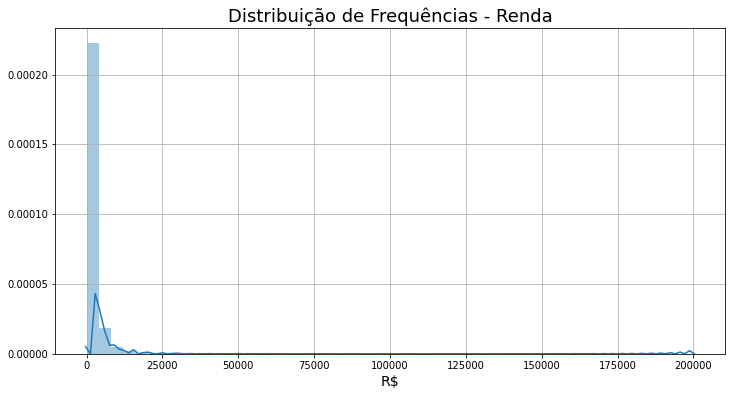

In [12]:
ax = sns.distplot(dados.Renda)
ax.grid(True)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de Frequências - Renda", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax

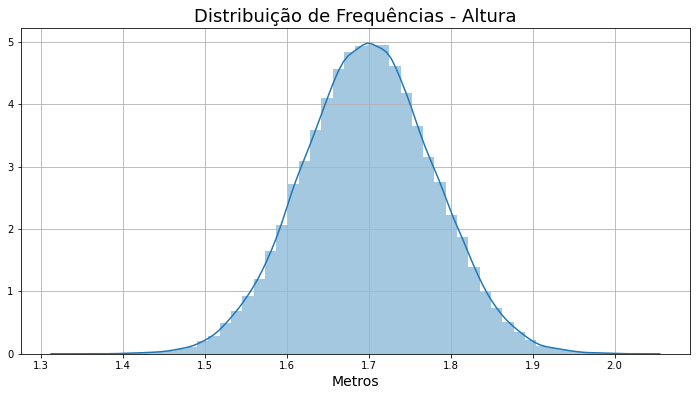

In [13]:
ax = sns.distplot(dados.Altura)
ax.grid(True)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de Frequências - Altura", fontsize=18)
ax.set_xlabel("Metros", fontsize=14)
ax

> ### Conclusões

Podemos ver que enquanto os dados coletados da altura indicam um gráfico simétrico, os dados de idade e renda apresentam uma assimetria a direita onde Moda<Mediana<Média.

No histograma de renda tem um disparate entre a distribuição média e o extremo superior, por isso a difícil visualização.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

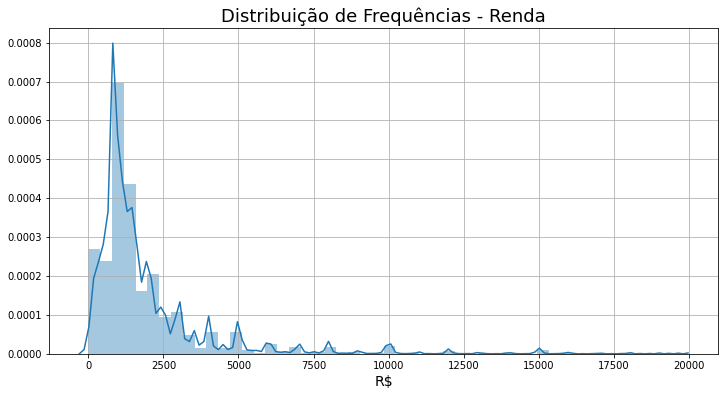

In [14]:
ax = sns.distplot(dados.query("Renda < 20000").Renda)
ax.grid(True)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de Frequências - Renda", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [15]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [16]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
# ".rename(index" nos renomeamos a coluna de índice e ".rename(columns" a linha de colunas com exceção do eixo
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [17]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor, normalize = True) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

É possível visualizar que dentre a amostra analisada o maior número de pessoas se encaixa na descrição parda do sexo masculino.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [18]:
média = dados.Renda.mean()
média

2000.3831988547631

### Obtenha a mediana

In [19]:
mediana = dados.Renda.median()
mediana

1200.0

### Obtenha a moda

In [20]:
moda = dados.Renda.mode()[0]
moda

788

### Obtenha o desvio médio absoluto

In [21]:
desvio_medio_absoluto = dados.Renda.mad()
desvio_medio_absoluto

1526.4951371644931

### Obtenha a variância

In [22]:
variancia = dados.Renda.var()
variancia

11044906.00622118

### Obtenha o desvio-padrão

In [23]:
desvio_padrao = dados.Renda.std()
desvio_padrao

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [35]:
renda_sexo_cor_1 = pd.crosstab(dados.Cor,
                         dados.Sexo,
                         aggfunc = {'mean', 'median', 'max'},
                         values = dados.Renda)
# Tradução = Agregue os valores de renda utilizando os parâmetros cruzados de cor e sexo e execute a função para extrair a media
renda_sexo_cor_1.rename(index = cor, inplace = True)
renda_sexo_cor_1.rename(columns = sexo, inplace = True)
renda_sexo_cor_1

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

Embora média e medianas apresentem uma medida de disperção eficiente, nem sempre é possível descrever os dados analisados em sua plenitude utilizando apenas esses paramêtros.

Os valores mais altos de renda para o sexo masculino é de uma pessoa da raça branca e do feminino uma indígena.

A média mais alta respectivamente é de um homem da raça amarela e mulher indígena.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [36]:
renda_sexo_cor_1 = pd.crosstab(dados.Cor,
                         dados.Sexo,
                         aggfunc = {'mad', 'var', 'std'},
                         values = dados.Renda)
# Tradução = Agregue os valores de renda utilizando os parâmetros cruzados de cor e sexo e execute a função para extrair a media
renda_sexo_cor_1.rename(index = cor, inplace = True)
renda_sexo_cor_1.rename(columns = sexo, inplace = True)
renda_sexo_cor_1

mad               ...           var              
Sexo        Masculino     Feminino  ...     Masculino      Feminino
Cor                                 ...                            
Indígena   798.910889  3007.892952  ...  1.449841e+06  1.429818e+08
Branca    2261.012346  1670.967106  ...  2.257002e+07  1.056909e+07
Preta      975.602482   705.453357  ...  3.749294e+06  1.821960e+06
Amarela   3709.597211  2549.146322  ...  3.295707e+07  1.392166e+07
Parda     1125.827704   811.580946  ...  5.345747e+06  2.547960e+06

[5 rows x 6 columns]

> ### Conclusões



### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

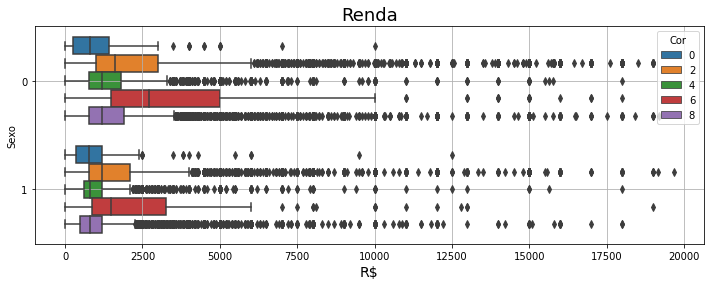

In [25]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data= dados.query("Renda < 20000"), orient = 'h', hue = 'Cor')
ax.figure.set_size_inches(12,4)
ax.set_title("Renda", fontsize = 18)
ax.set_xlabel("R$", fontsize = 14)
ax.grid(True)
ax

In [26]:
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}

> ### Conclusões

O boxplot trás a informação que para pessoas com renda abaixo de 20k, homens geralmente ganham mais que mulheres.
E no quesito raça podemos classificar em ordem de maior renda: Amarela, branca, preta e parda bem próximos e indígena em último lugar.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [37]:
from scipy import stats
Desafio1 = stats.percentileofscore(dados.Renda, 788, kind='weak')
print("{0:.2f}%".format(Desafio1))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [39]:
print("R$ {0:.2f}".format(dados.Renda.quantile(q=0.99)))

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [40]:
renda_anos_de_estudo_sexo = pd.crosstab(dados['Anos de Estudo'],
                         dados.Sexo,
                         aggfunc = ['mean', 'median', 'max', 'std'],
                         values = dados.Renda)
# Tradução = Agregue os valores de renda utilizando os parâmetros cruzados de cor e sexo e execute a função para extrair a media
renda_anos_de_estudo_sexo.rename(index = anos_de_estudo, inplace = True)
renda_anos_de_estudo_sexo.rename(columns = sexo, inplace = True)
renda_anos_de_estudo_sexo

mean  ...          std
Sexo                              Masculino  ...     Feminino
Anos de Estudo                               ...             
Sem instrução e menos de 1 ano   799.494638  ...   639.311534
1 ano                            895.629047  ...   425.291842
2 anos                           931.178986  ...   498.234168
3 anos                          1109.203862  ...   424.124446
4 anos                          1302.329283  ...   629.553397
5 anos                          1338.653218  ...   635.782641
6 anos                          1448.875419  ...   574.547028
7 anos                          1465.497940  ...   602.038029
8 anos                          1639.396667  ...   896.781213
9 anos                          1508.038850  ...   973.221652
10 anos                         1731.270847  ...   620.611907
11 anos                         2117.060504  ...  1819.040417
12 anos                         2470.330776  ...  4851.833513
13 anos                         3195.099154  ...  2053.789771
14 anos                         3706.620269  ...  2064.083336
15 anos ou mais                 6134.279790  ...  4212.770709
Não determinados                1295.761905  ...   459.985964

[17 rows x 8 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

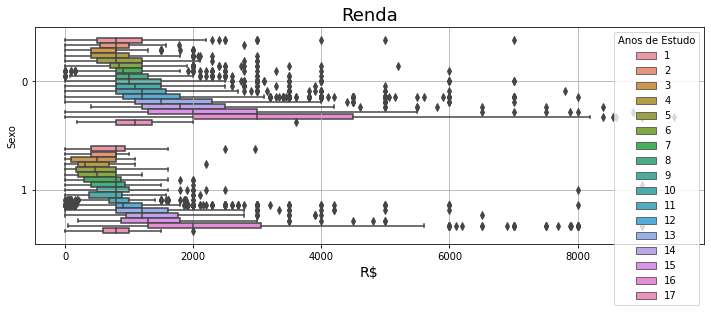

In [30]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data= dados.query("Renda < 10000 and Idade<=30"), orient = 'h', hue = 'Anos de Estudo')
ax.figure.set_size_inches(12,4)
ax.set_title("Renda", fontsize = 18)
ax.set_xlabel("R$", fontsize = 14)
ax.grid(True)
ax

> ### Conclusões

Podemos observar novamente que a média de renda pe maior para o sexo masculino e podemos considerar também que ela aumenta conforme aumenta os anos de estudo também.

A análise se repete se considerarmos pessoas da mesma idade.

Podemos ver também que não existem mulheres com menos de 20 anos sem estudo ou com menos de 5 anos de estudo

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para construir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [31]:
renda_federacao = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_federacao.rename(index = uf, inplace = True)
renda_federacao.columns = ['Média', 'Mediana', 'Máximo', 'Desvio Padrão']
renda_federacao.sort_values(by='Desvio Padrão',ascending=False)

,Média,Mediana,Máximo,Desvio Padrão
UF,,,,
Distrito Federal,4241.954722,2000,100000,5550.463338
Rio de Janeiro,2496.403168,1400,200000,5214.583518
Paraná,2493.870753,1500,200000,4302.937995
Minas Gerais,2056.432084,1200,100000,3584.721547
Espírito Santo,2026.383852,1274,100000,3513.846868
Bahia,1429.645094,800,200000,3507.917248
São Paulo,2638.104986,1600,80000,3503.777366
Santa Catarina,2470.854945,1800,80000,3137.651112
Mato Grosso do Sul,2262.604167,1500,42000,3031.419122


### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

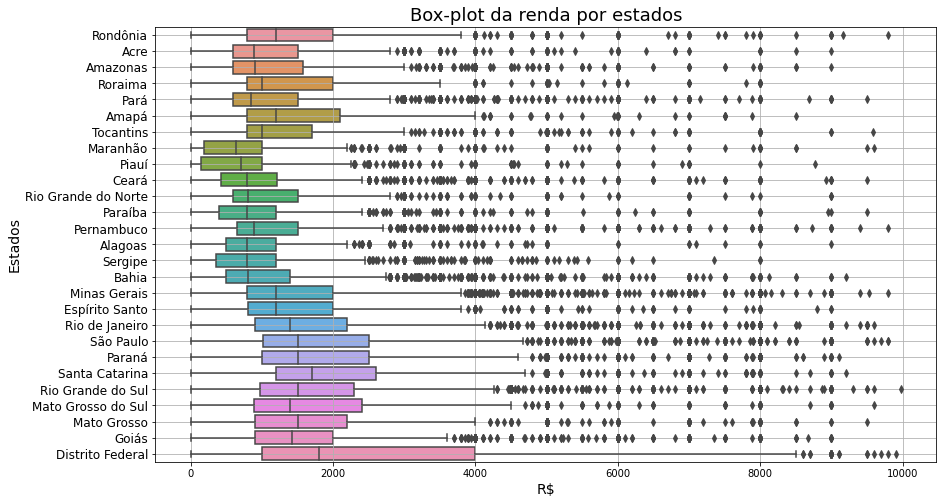

In [42]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data= dados.query("Renda < 10000"), orient = 'h')
ax.figure.set_size_inches(14,8)
ax.set_title("Box-plot da renda por estados", fontsize = 18)
ax.set_xlabel("R$", fontsize = 14)
ax.set_ylabel("Estados", fontsize = 14)
ax.set_yticklabels([key for key in uf.values()], fontsize = 12)

ax.grid(True)
ax

In [33]:
uf[25]

'Paraíba'

> ### Conclusões

O Distrito Federal é o estado com a maior renda média utilizando a base analisada, para uma renda menos que 10 mil, seguido por Santa Catarina, São Paulo e Paraná.

Já os com a renda média mais baixa são: Piauí,Maranhão,Sergipe e Paraíba.

Um dado fora da normalidade é o 3 quartil dos dados do DF que apresenta que 25% da população ganha mais que grande parte da população brasileira.